# Carvana Price Analysis

### Questions to Explore
- What car sold the most?
- What car year sold the most?
- Is there a relationship/correlation between car age and price?
- Is there a relationship/correlation between car mileage and price?
- Can we predict the car price given the make, model, age, and mileage?

### Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import CSV file and explore data
car_data = pd.read_csv('Data/carvana.csv')

car_data.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [3]:
car_data.shape

(22000, 4)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [5]:
car_data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [6]:
car_data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [7]:
car_data.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

In [8]:
car_data['Name'].unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

In [9]:
car_data['Year'].unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

There are errors in the 'Year' column that need to be cleaned. We will remove these 'Year' entries.

In [10]:
# Clean data to remove errors in 'Year'
car_data['Year'] = car_data['Year'].apply(lambda x: x if (x >= 2000 and x<= 2030) else np.nan)

In [11]:
car_data['Year'].isna().sum()

2851

We removed 2851 entries from the 'Year' column and replaced with a null value since we couldn't be certain what the correct value should be.

In [12]:
# Add 'Age' column
car_data['Age'] = 2023 - car_data['Year']

car_data.head()

,Name,Year,Miles,Price,Age
0,Chevrolet Trax,2018.0,41946,16990,5.0
1,GMC Terrain,2020.0,45328,23990,3.0
2,Jeep Wrangler,2012.0,81068,21590,11.0
3,Jeep Renegade,2019.0,35372,21590,4.0
4,BMW X,NaN,68992,22990,NaN


In [13]:
# Copy the dataframe and remove entries with a null value
car_data2 =car_data.copy()
car_data2 = car_data2.dropna()

In [14]:
# Convert 'Year' and 'Age' columns to int
car_data2['Year'] = car_data2['Year'].astype('int32')
car_data2['Age'] = car_data2['Age'].astype('int32')

car_data2.head()

,Name,Year,Miles,Price,Age
0,Chevrolet Trax,2018,41946,16990,5
1,GMC Terrain,2020,45328,23990,3
2,Jeep Wrangler,2012,81068,21590,11
3,Jeep Renegade,2019,35372,21590,4
5,Buick Encore,2019,47973,18590,4


# Visualizations

Text(0.5, 1.0, 'Cars Sold by Year Built')

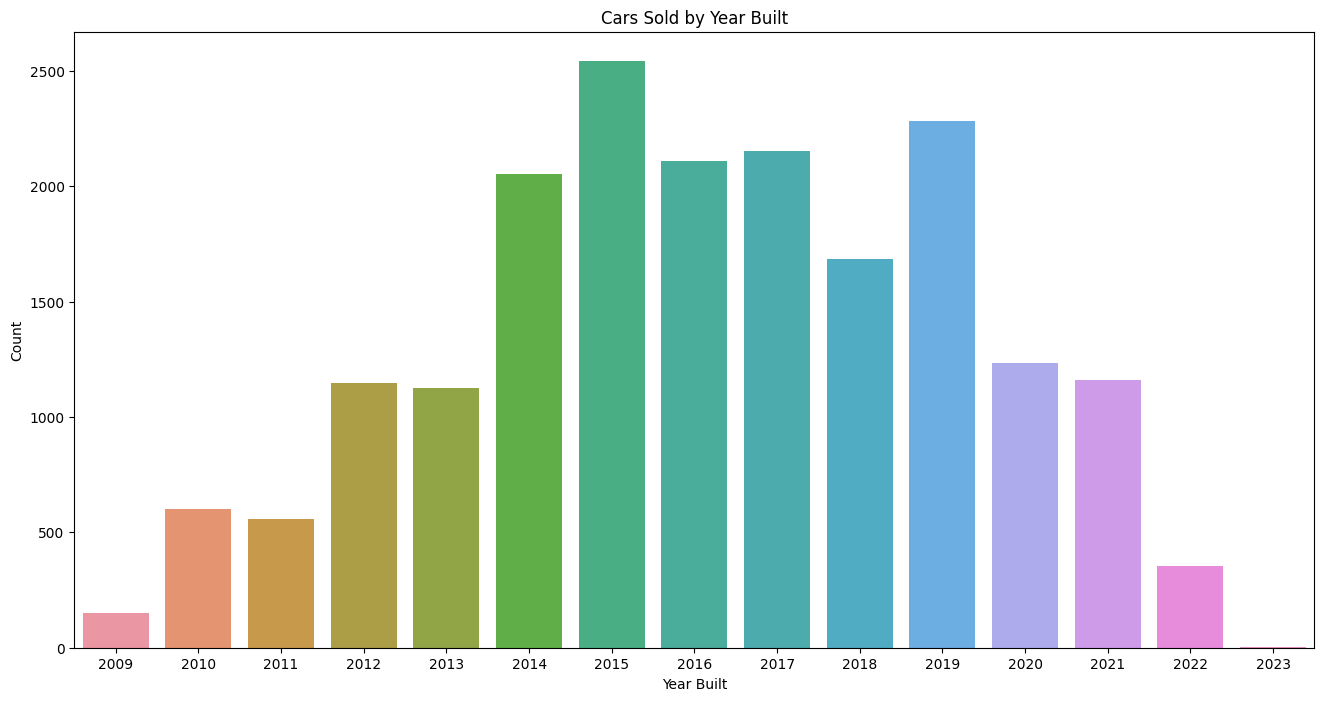

In [15]:
# Show the number of cars sold by year built
fig, ax = plt.subplots(figsize=(16, 8))

sns.countplot(x='Year', data=car_data2)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Cars Sold by Year Built')

Based on our data, the most cars sold were built in 2015.

Text(0.5, 1.0, 'Top 20 Car Make and Model Sold')

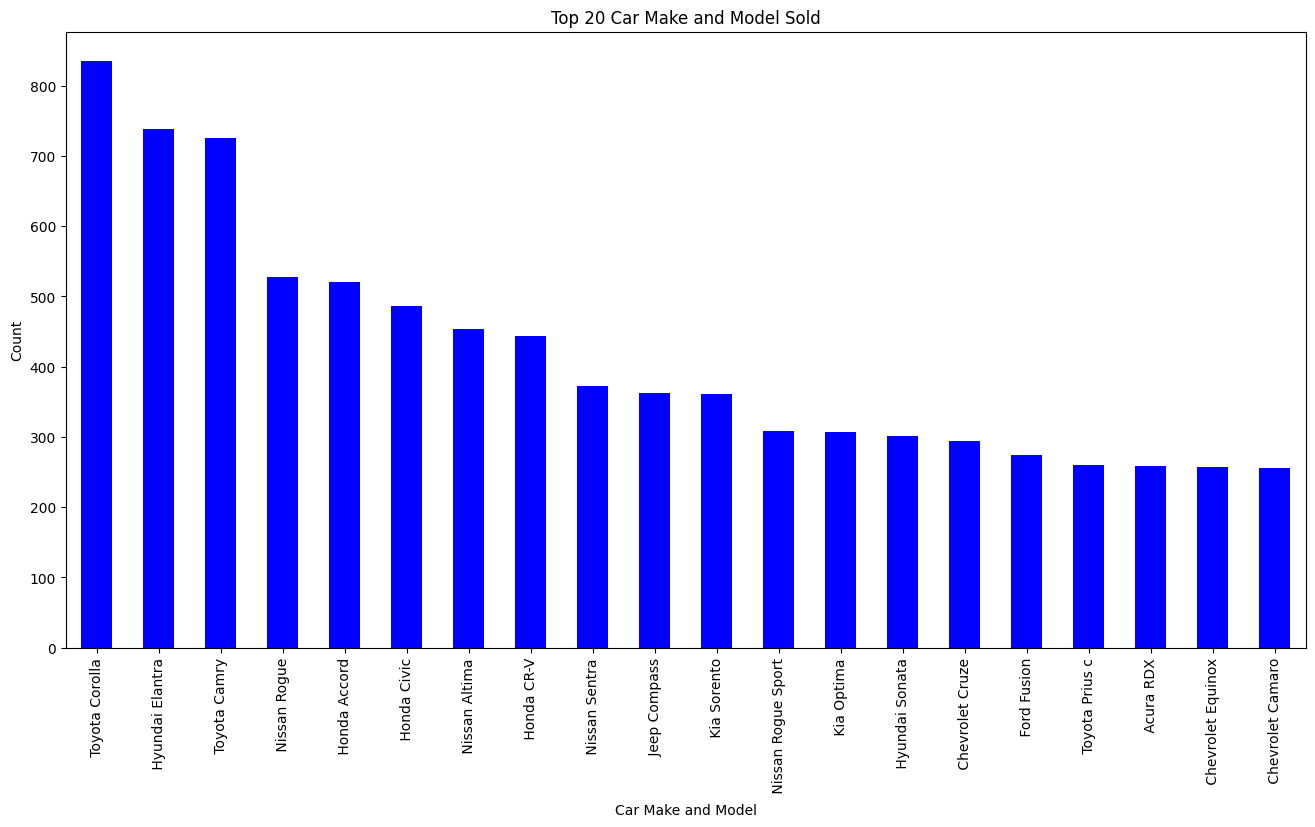

In [16]:
# What are the top 20 make and models sold
fig, ax = plt.subplots(figsize=(16, 8))

car_data2['Name'].value_counts().head(20).plot(kind='bar', color='blue')
plt.xlabel('Car Make and Model')
plt.ylabel('Count')
plt.title('Top 20 Car Make and Model Sold')

In [17]:
# Most sold car make and model
most_sold = car_data['Name'].value_counts().idxmax()
num_sold_max = car_data['Name'].value_counts().max()

# Least sold car make and model
least_sold = car_data['Name'].value_counts().idxmin()
num_sold_least = car_data['Name'].value_counts().min()

print('The', most_sold,'is the most sold car with', num_sold_max, 'models sold. The', least_sold,'is the least sold car with only', num_sold_least, 'model sold.')

The  Toyota Corolla is the most sold car with 835 models sold. The  Volkswagen New Beetle is the least sold car with only 1 model sold.


Text(0, 0.5, 'Price')

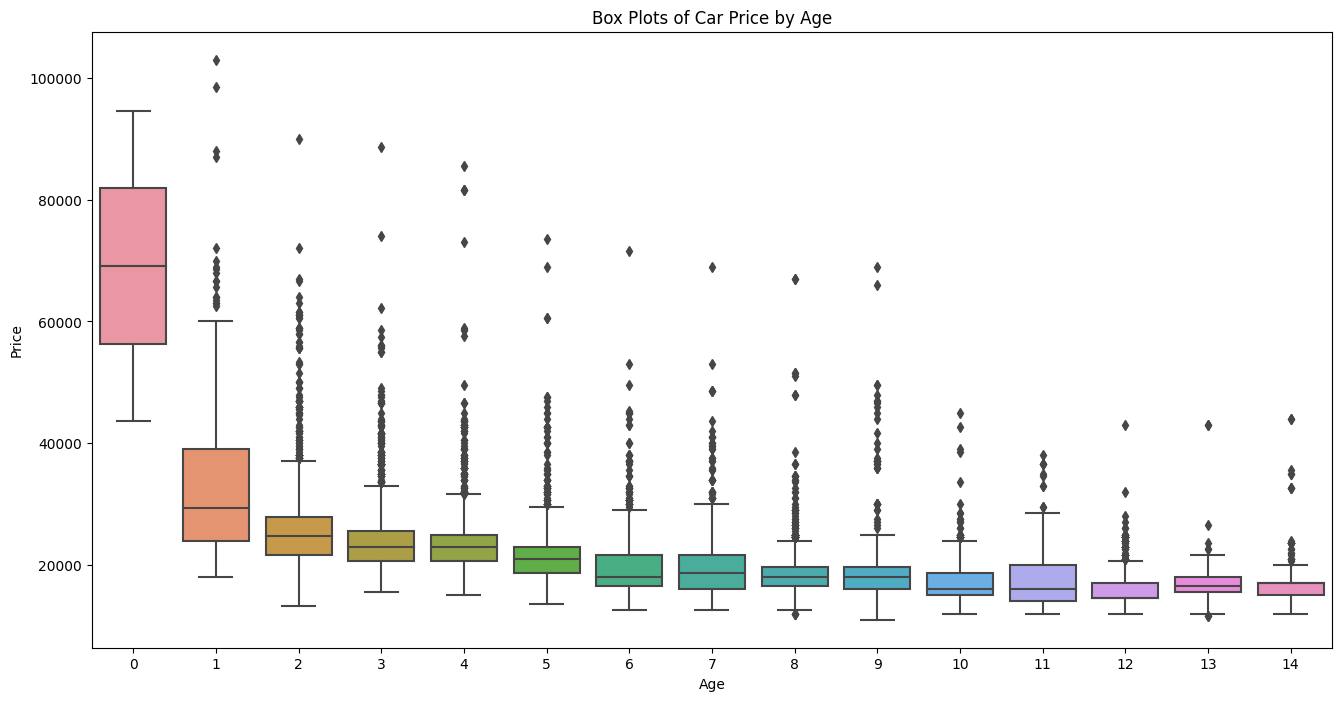

In [18]:
# Show relationship between 'Price' and 'Age'
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(x='Age', y='Price', data=car_data2)
ax.set_title('Box Plots of Car Price by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Price')

The box plots above show the price declines over time. We can see the median price for each age, represented by the middle line in each box, decreases as age increases.

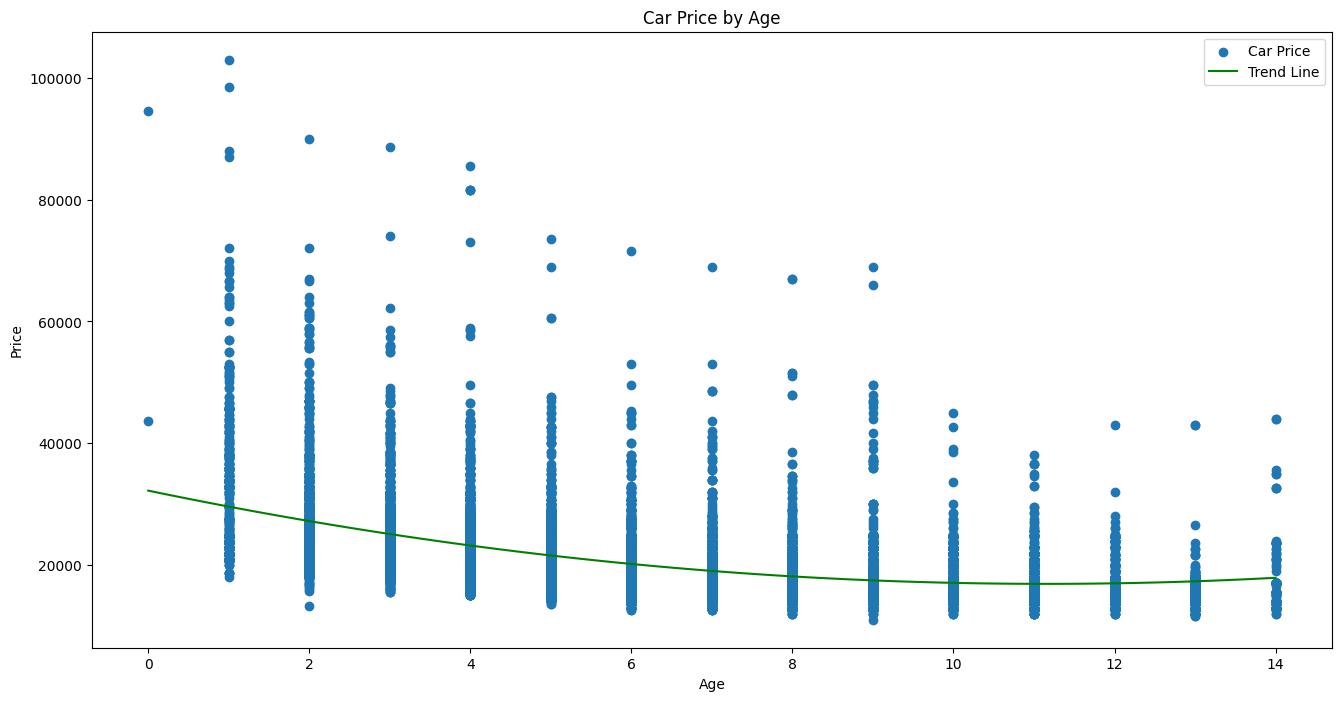

In [19]:
# Show relationship between 'Price' and 'Age' with a trend line
fig, ax = plt.subplots(figsize = (16, 8))
x = car_data2['Age']
y = car_data2['Price']
a, b, c = np.polyfit(x, y, deg=2)

# Plot car price by age
plt.scatter(x, y)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='green', label='Trend Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Price by Age')

ax.legend(['Car Price', 'Trend Line'])

Consistent with the box plot chart, the above chart clearly shows a decline in price as the car's age increases. 

In [20]:
corr = car_data2['Age'].corr(car_data2['Price'])

corr

-0.49960911085867415

There is a moderate negative correlation between age and price, meaning as age increases price decreases.

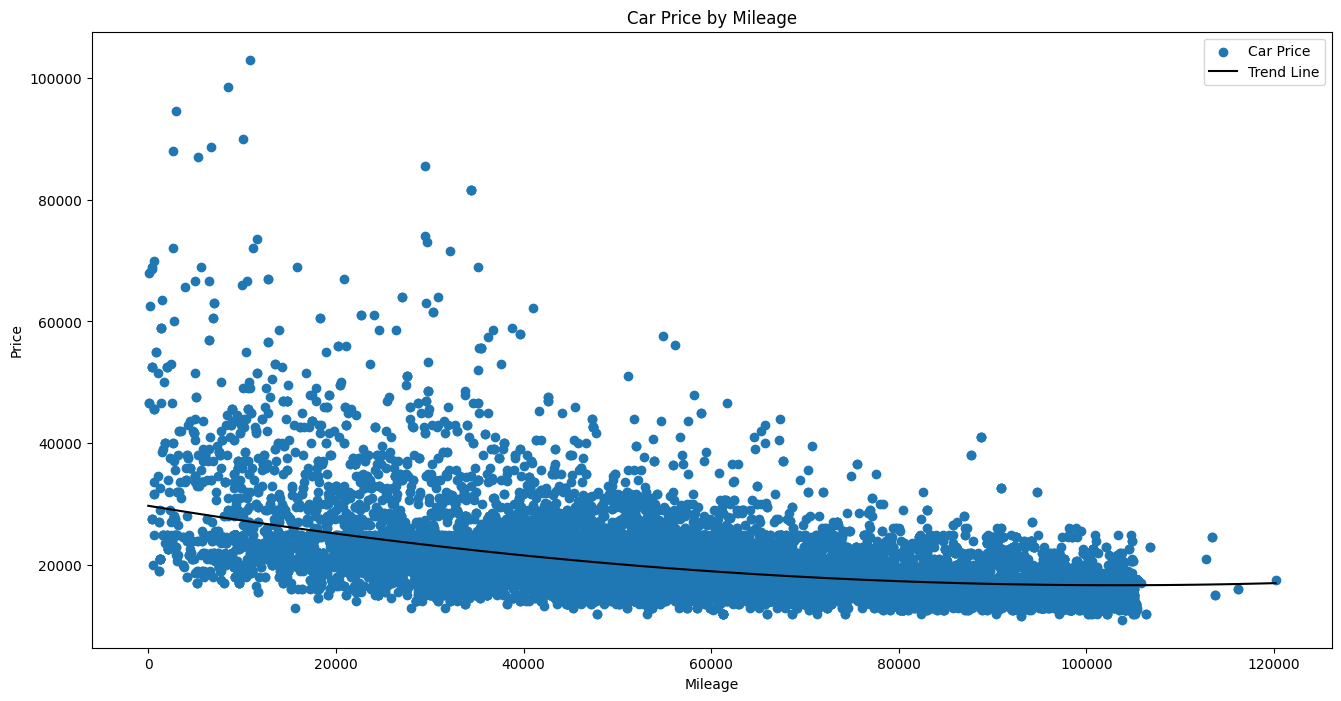

In [21]:
# Show relationship between 'Mileage' and 'Price'
fig, ax = plt.subplots(figsize=(16, 8))
x = car_data2['Miles']
y = car_data2['Price']
a, b, c = np.polyfit(x, y, 2)

# Plot car price by mileage with trend line
plt.scatter(x, y)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='black', label="Trend Line")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Car Price by Mileage')
plt.legend(['Car Price', 'Trend Line'])

Similarly to the effect of age, we see in the graph above that as a car's mileage increases, the price declines. 

In [22]:
corr2 = car_data2['Miles'].corr(car_data2['Price'])

corr2

-0.4850642865161131

Once again, there is a moderate negative correlation between mileage and price, meaning as mileage increases price decreases.